In [1]:
import jax.numpy as jnp 
import matplotlib.pyplot as plt 

try:
    from lqrax.discrete import LQR
except:
    %pip install lqrax
    from lqrax.discrete import LQR

The discrete-time `LQR` module solves the following time-varying LQR problem:

$$
\arg\min_{u_{0\dots T}} \sum_{t=0}^T (x_t-\bar{x}_t)^\top Q (x_t-\bar{x}_t) + u_t^\top R u_t
$$
$$
\text{s.t. } x_{t+1} = A_t x_t + B_t u_t, \quad \forall t\in[0, \dots, T{-}1]
$$

In [2]:
class DoubleIntegratorLQR(LQR):
    def __init__(self, x_dim, u_dim, Q, R):
        super().__init__(x_dim, u_dim, Q, R)
    
    def dyn(self, xt, ut):
        dt = 0.01
        A = jnp.array([
            [1.0, 0.0, dt, 0.0],
            [0.0, 1.0, 0.0, dt],
            [0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 1.0]
        ])
        B = jnp.array([
            [0.5 * dt**2, 0.0],
            [0.0, 0.5 * dt**2],
            [dt, 0.0],
            [0.0, dt]
        ])
        return A @ xt + B @ ut

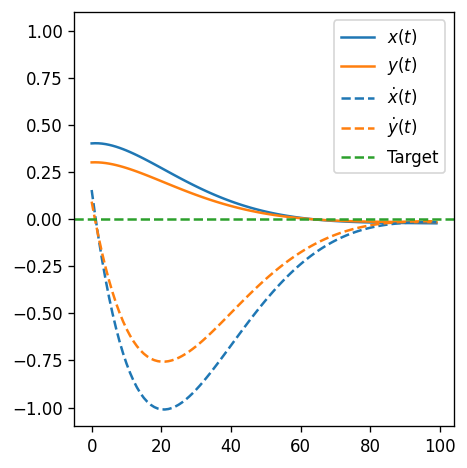

In [3]:
Q = jnp.diag(jnp.array([1.0, 1.0, 0.01, 0.01]))
R = jnp.eye(2) * 0.001
double_integraotr_lqr = DoubleIntegratorLQR(x_dim=4, u_dim=2, Q=Q, R=R)

tsteps = 100
ref_x_traj = jnp.zeros((tsteps, 4))

x0 = jnp.array([0.4, 0.3, 0.3, 0.2])
dummy_u_traj = jnp.zeros((tsteps, 2))

dummy_x_traj, A_traj, B_traj = double_integraotr_lqr.linearize_dyn(x0, dummy_u_traj)
opt_u_traj, opt_x_traj = double_integraotr_lqr.solve(x0, A_traj, B_traj, ref_x_traj)

fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi=120, tight_layout=True)
ax.set_ylim(-1.1, 1.1)
ax.plot(opt_x_traj[:,0], color='C0', label=r'$x(t)$')
ax.plot(opt_x_traj[:, 1], color='C1', label=r'$y(t)$')
ax.plot(opt_x_traj[:, 2], color='C0', linestyle='--', label=r'$\dot{x}(t)$')
ax.plot(opt_x_traj[:, 3], color='C1', linestyle='--', label=r'$\dot{y}(t)$')
ax.axhline(0.0, 0.0, 1.0, color='C2', linestyle='--', label='Target')
ax.legend()
plt.show()
plt.close()